In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
def drop_missing_rows(data):
    return data.dropna()

In [4]:
data = drop_missing_rows(data)

In [5]:
data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [6]:
label_encoder = LabelEncoder()
data['area_type'] = label_encoder.fit_transform(data['area_type'])
data['availability'] = label_encoder.fit_transform(data['availability'])
data['location'] = label_encoder.fit_transform(data['location'])
data['size'] = label_encoder.fit_transform(data['size'])
data['total_sqft'] = label_encoder.fit_transform(data['total_sqft'])

In [7]:
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [8]:
X = data.drop('price', axis=1)
y = data['price']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = model.predict(X_test_scaled)

C:\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [13]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [14]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 47431.389006198755
R-squared: -1.5337276187939803


In [15]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Actual vs. Predicted Prices')

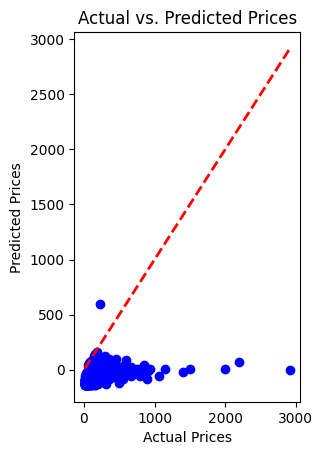

In [16]:
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')

Text(0.5, 1.0, 'Error Loss')

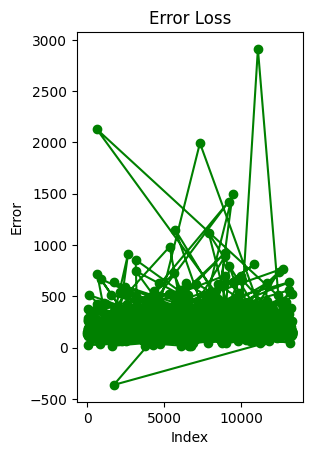

In [17]:
plt.subplot(1, 2, 2)
plt.plot(y_test - y_pred, marker='o', linestyle='-', color='green')
plt.xlabel('Index')
plt.ylabel('Error')
plt.title('Error Loss')


In [18]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>